In [4]:
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score



In [5]:
texts = [
    "Compensation",
    "Changed my mind",
    "Undelivered shipment",
    "Didn't like",
    "Size too large",
    "Wrong product sent",
    "Size too small",
    "Defective product sent",
    "Ordered wrong product",
    "Better price available",
    "Missing product",
    "Missing part/accessory",
    "Delayed shipment",
    "Rejected return not sent back",
    "Want to exchange defective product"
]

In [6]:
model = SentenceTransformer('all-mpnet-base-v2')
embeddings = model.encode(texts)

distances = pdist(embeddings, metric='cosine')  # Çiftler arası cosine mesafeleri hesapla
distance_matrix = squareform(distances)  # Simetriği oluştur

linkage_matrix = linkage(distances, method='ward')  # Ward yöntemi

C:\Users\berka\ss\customer segmentation\.venv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\berka\.cache\huggingface\hub\models--sentence-transformers--all-mpnet-base-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


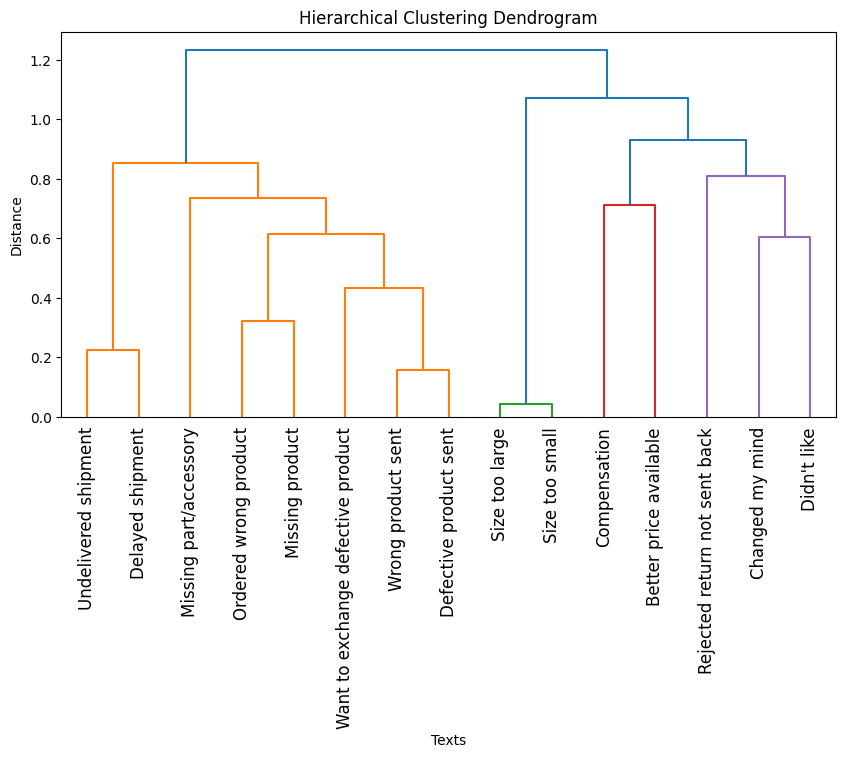

In [7]:
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=texts, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Texts")
plt.ylabel("Distance")
plt.show()



In [8]:
silhouette_scores = []
for k in range(2, 10): 
    clusters = fcluster(linkage_matrix, k, criterion='maxclust')
    score = silhouette_score(distance_matrix, clusters, metric='precomputed')
    silhouette_scores.append((k, score))

optimal_k = max(silhouette_scores, key=lambda x: x[1])[0]
print(f"Optimal cluster sayısı: {optimal_k}")

clusters = fcluster(linkage_matrix, optimal_k, criterion='maxclust')

cluster_assignments = [{"Text": text, "Cluster": cluster} for text, cluster in zip(texts, clusters)]
for assignment in cluster_assignments:
    print(assignment)

Optimal cluster sayısı: 6
{'Text': 'Compensation', 'Cluster': np.int32(4)}
{'Text': 'Changed my mind', 'Cluster': np.int32(5)}
{'Text': 'Undelivered shipment', 'Cluster': np.int32(1)}
{'Text': "Didn't like", 'Cluster': np.int32(5)}
{'Text': 'Size too large', 'Cluster': np.int32(3)}
{'Text': 'Wrong product sent', 'Cluster': np.int32(2)}
{'Text': 'Size too small', 'Cluster': np.int32(3)}
{'Text': 'Defective product sent', 'Cluster': np.int32(2)}
{'Text': 'Ordered wrong product', 'Cluster': np.int32(2)}
{'Text': 'Better price available', 'Cluster': np.int32(4)}
{'Text': 'Missing product', 'Cluster': np.int32(2)}
{'Text': 'Missing part/accessory', 'Cluster': np.int32(2)}
{'Text': 'Delayed shipment', 'Cluster': np.int32(1)}
{'Text': 'Rejected return not sent back', 'Cluster': np.int32(6)}
{'Text': 'Want to exchange defective product', 'Cluster': np.int32(2)}


In [11]:
cluster_labels = {
    1: "Logistics Issues",
    2: "Product Issues",
    3: "Fit/Size Issues",
    4: "Financial Concerns",
    5: "Personal Preferences",
    6: "Special Cases"
}

In [12]:
import pandas as pd

results = pd.DataFrame([
    {'Text': 'Compensation', 'Cluster': 4},
    {'Text': 'Changed my mind', 'Cluster': 5},
    {'Text': 'Undelivered shipment', 'Cluster': 1},
    {'Text': "Didn't like", 'Cluster': 5},
    {'Text': 'Size too large', 'Cluster': 3},
    {'Text': 'Wrong product sent', 'Cluster': 2},
    {'Text': 'Size too small', 'Cluster': 3},
    {'Text': 'Defective product sent', 'Cluster': 2},
    {'Text': 'Ordered wrong product', 'Cluster': 2},
    {'Text': 'Better price available', 'Cluster': 4},
    {'Text': 'Missing product', 'Cluster': 2},
    {'Text': 'Missing part/accessory', 'Cluster': 2},
    {'Text': 'Delayed shipment', 'Cluster': 1},
    {'Text': 'Rejected return not sent back', 'Cluster': 6},
    {'Text': 'Want to exchange defective product', 'Cluster': 2}
])

results['Cluster Label'] = results['Cluster'].map(cluster_labels)

print(results)

                                  Text  Cluster         Cluster Label
0                         Compensation        4    Financial Concerns
1                      Changed my mind        5  Personal Preferences
2                 Undelivered shipment        1      Logistics Issues
3                          Didn't like        5  Personal Preferences
4                       Size too large        3       Fit/Size Issues
5                   Wrong product sent        2        Product Issues
6                       Size too small        3       Fit/Size Issues
7               Defective product sent        2        Product Issues
8                Ordered wrong product        2        Product Issues
9               Better price available        4    Financial Concerns
10                     Missing product        2        Product Issues
11              Missing part/accessory        2        Product Issues
12                    Delayed shipment        1      Logistics Issues
13       Rejected re